# Dataset sourced from Kaggle Superstore Sales

# Link:
https://www.kaggle.com/datasets/bhanupratapbiswas/superstore-sales

In [10]:
# Import libraries for analysis and visuals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chart Style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('Set2')

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Load CSV Dataset from Google Drive
file_path = '/content/drive/MyDrive/superstore_final_dataset.csv'

import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path, encoding='latin-1')

# Preview the data

df.head()

Mounted at /content/drive


,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [12]:
# Basic data summary
df.info()

# Check for missing values
missing_data = df.isnull().sum()
print('Missing values in each colum:\n',
missing_data[missing_data > 0])

# Describe stats for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row_ID,Postal_Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


                       Sales
Category                    
Technology       827455.8730
Furniture        728658.5757
Office Supplies  705422.3340


<Figure size 800x500 with 0 Axes>

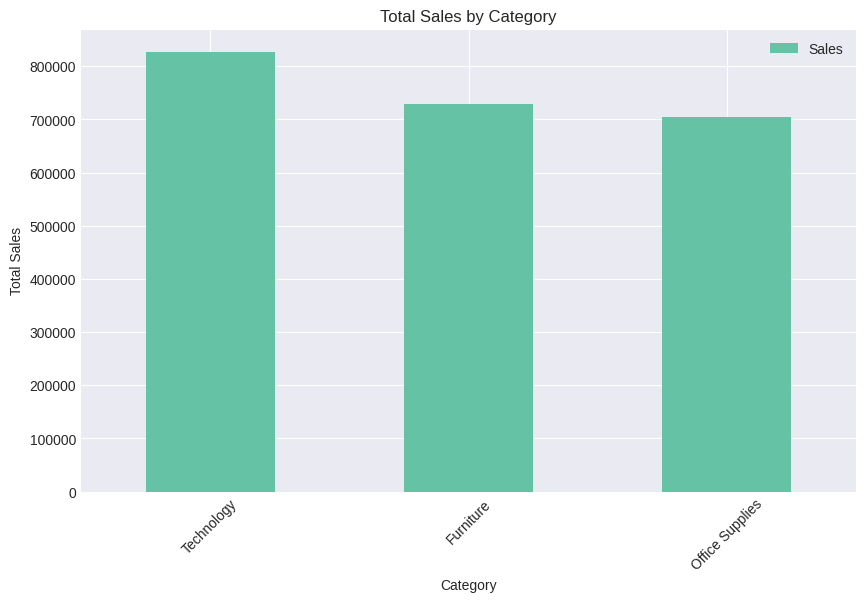

In [19]:
# Total sales by category
category_sales = df.groupby('Category')[['Sales']].sum().sort_values(by='Sales', ascending=False)
print(category_sales)

# Plot total sales by Category
plt.figure(figsize=(8,5))
category_sales.plot(kind='bar',
stacked=True, figsize=(10,6))
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

                    Sales
Sub_Category             
Phones        327782.4480
Chairs        322822.7310
Storage       219343.3920
Tables        202810.6280
Binders       200028.7850
Machines      189238.6310
Accessories   164186.7000
Copiers       146248.0940
Bookcases     113813.1987
Appliances    104618.4030
Furnishings    89212.0180
Paper          76828.3040
Supplies       46420.3080
Art            26705.4100
Envelopes      16128.0460
Labels         12347.7260
Fasteners       3001.9600


<Figure size 1200x600 with 0 Axes>

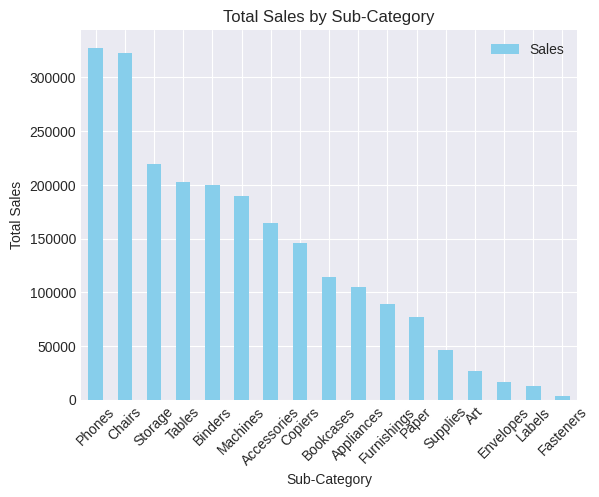

In [27]:
# Total Sales by sub-category
sub_category_sales = df.groupby('Sub_Category')[['Sales']].sum().sort_values(by='Sales', ascending=False)
print(sub_category_sales)

# Plot total sales by sub-category
plt.figure(figsize=(12,6))
sub_category_sales.plot(kind='bar',
color='skyblue')
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

               Sales
Region              
West     710219.6845
East     669518.7260
Central  492646.9132
South    389151.4590


<Figure size 800x500 with 0 Axes>

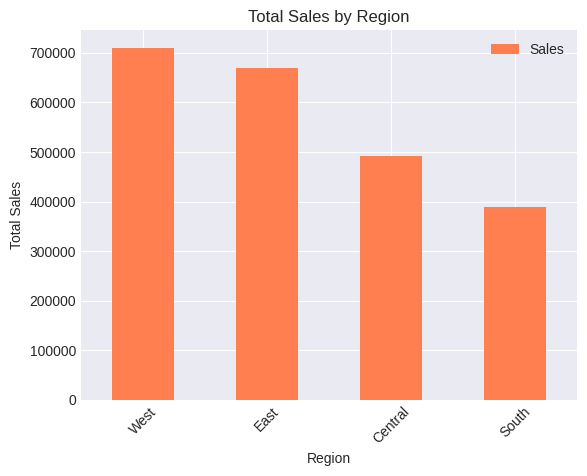

In [30]:
# Total sales by region
region_sales = df.groupby('Region')[['Sales']].sum().sort_values(by='Sales', ascending=False)
print(region_sales)

# Plot total sales by region
plt.figure(figsize=(8,5))
region_sales.plot(kind='bar',
color='coral')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

                    Sales
Segment                  
Consumer     1.148061e+06
Corporate    6.884941e+05
Home Office  4.249822e+05


<Figure size 800x500 with 0 Axes>

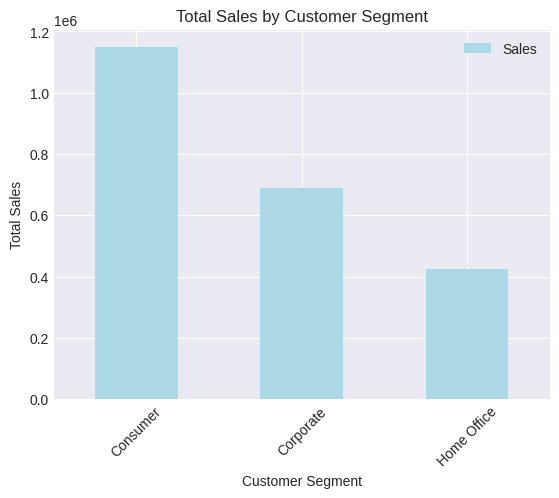

In [33]:
# Total sales by customer segment
segment_sales = df.groupby('Segment')[['Sales']].sum().sort_values(by='Sales', ascending=False)
print(segment_sales)

# Plot total sales by customer segment
plt.figure(figsize=(8,5))
segment_sales.plot(kind='bar',
color='lightblue')
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

<ipython-input-35-6179f84094a8>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Order_Date')['Sales'].resample('M').sum().plot(kind='line', figsize=(12,6))


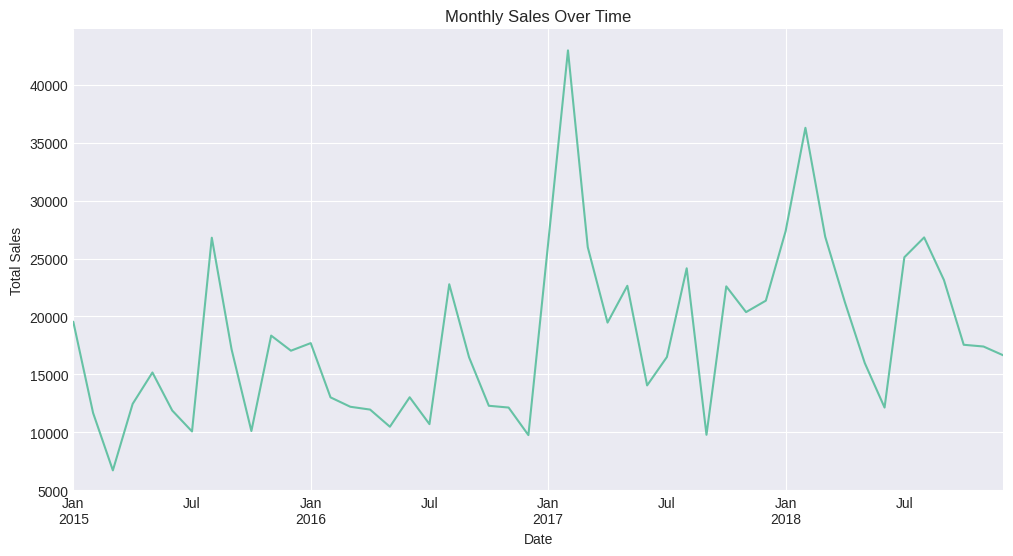

In [35]:
# Convert Order_Date to datetime if needed
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

# Plot sales over time if dates are valid
df.set_index('Order_Date')['Sales'].resample('M').sum().plot(kind='line', figsize=(12,6))
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

                                                        Sales
Product_Name                                                 
Canon imageCLASS 2200 Advanced Copier               61599.824
Fellowes PB500 Electric Punch Plastic Comb Bind...  27453.384
Cisco TelePresence System EX90 Videoconferencin...  22638.480
HON 5400 Series Task Chairs for Big and Tall        21870.576
GBC DocuBind TL300 Electric Binding System          19823.479
GBC Ibimaster 500 Manual ProClick Binding System    19024.500
Hewlett Packard LaserJet 3310 Copier                18839.686
HP Designjet T520 Inkjet Large Format Printer -...  18374.895
GBC DocuBind P400 Electric Binding System           17965.068
High Speed Automatic Electric Letter Opener         17030.312


<Figure size 2000x600 with 0 Axes>

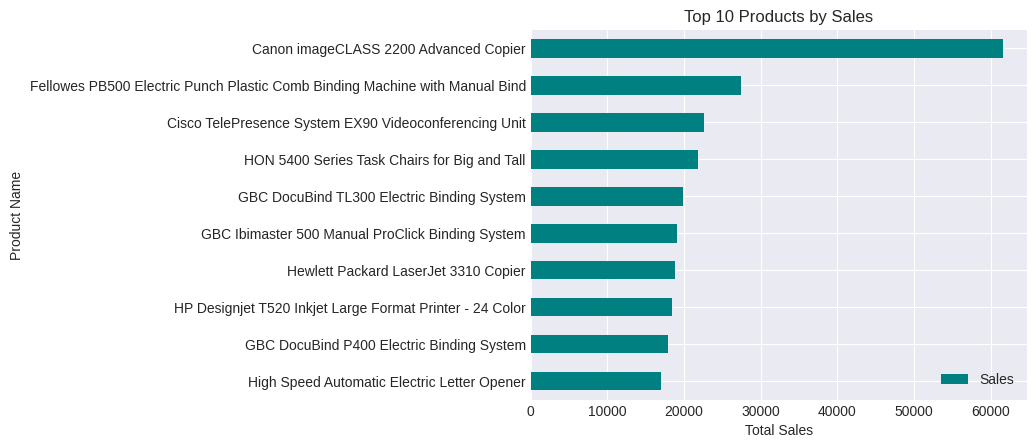

In [41]:
# Top 10 products by sales
top_products = df.groupby('Product_Name')[['Sales']].sum().sort_values(by='Sales', ascending=False).head(10)
print(top_products)

# Plot top 10 products by sales
plt.figure(figsize=(20,6))
top_products.plot(kind='barh',
color='teal')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()
plt.show()

                       Sales
Ship_Mode                   
First Class     3.455723e+05
Same Day        1.252190e+05
Second Class    4.499142e+05
Standard Class  1.340831e+06


<Figure size 800x500 with 0 Axes>

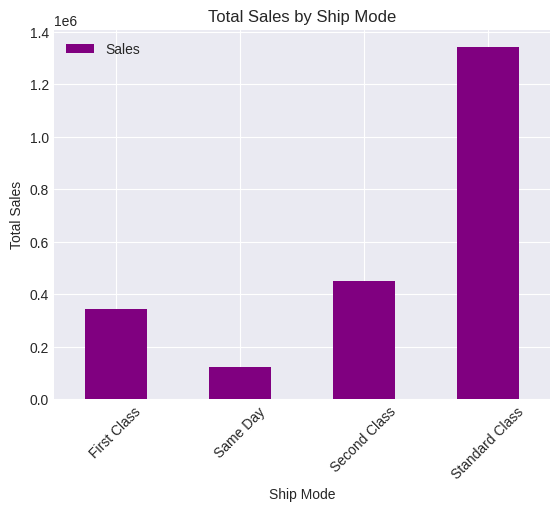

In [42]:
# Total sales by ship mode
ship_mode_sales = df.groupby('Ship_Mode')[['Sales']].sum()
print(ship_mode_sales)

# Plot sales by ship mode
plt.figure(figsize=(8,5))
ship_mode_sales.plot(kind='bar',
color='purple')
plt.title('Total Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

Ship_Mode  First Class   Same Day  Second Class  Standard Class
Region                                                         
Central     58057.2978  20105.922    97605.7134     316877.9800
East       110436.6930  43316.464   115108.2580     400657.3110
South       49045.9160  21017.173    93434.5365     225653.8335
West       128032.3505  40779.480   143765.6715     397642.1825


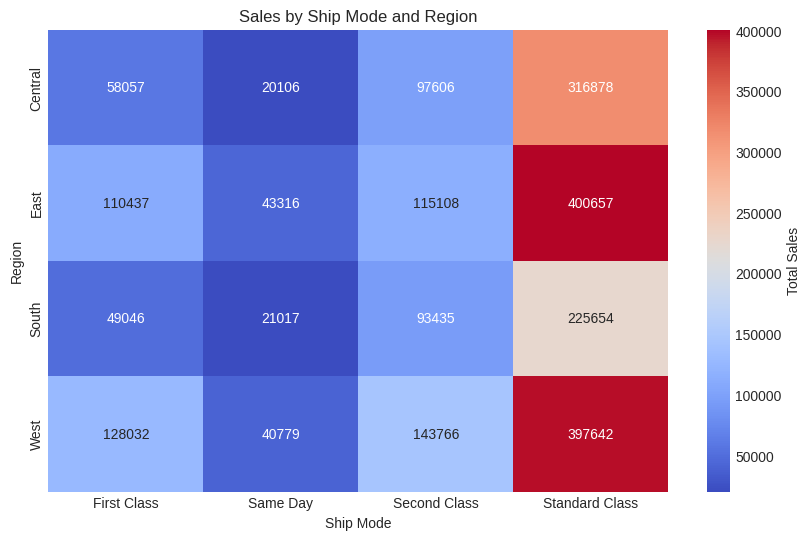

In [47]:
# Create a pivot table of sales by ship mode and region
ship_mode_region_sales = pd.pivot_table(df,values='Sales', index='Region', columns='Ship_Mode', aggfunc='sum', fill_value=0)

# Display the Pivot Table
print(ship_mode_region_sales)


# Plot the data as a heatmap for better visuals
plt.figure(figsize=(10,6))
sns.heatmap(ship_mode_region_sales, annot=True, fmt='.0f', cmap='coolwarm',
cbar_kws={'label':'Total Sales'}) #Label for Color Bar

# Add labels and title
plt.xlabel('Ship Mode')
plt.ylabel('Region')
plt.title('Sales by Ship Mode and Region')
plt.show()